In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
base = pd.read_csv('results/Base_raw_evaluation.csv')
cod = pd.read_csv('results/CoD_raw_evaluation.csv')
coe = pd.read_csv('results/CoE_raw_evaluation.csv')
cokg = pd.read_csv('results/CoKG_raw_evaluation.csv')

/tmp/ipykernel_42739/4092677510.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(base['rouge1_recall'], hist=None, label='base')
/tmp/ipykernel_42739/4092677510.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cod['rouge1_recall'], hist=None, label='cod')
/tmp/ipykernel_4

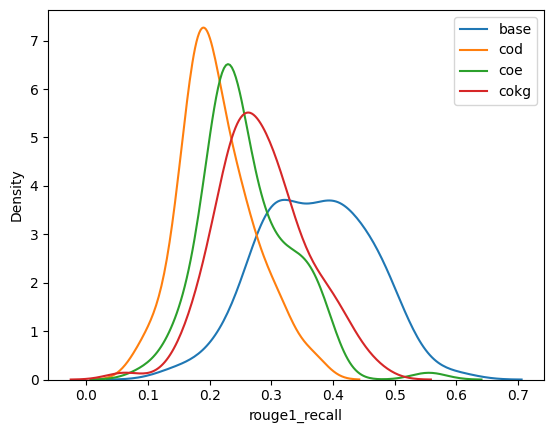

In [15]:
sns.distplot(base['rouge1_recall'], hist=None, label='base')
sns.distplot(cod['rouge1_recall'], hist=None, label='cod')
sns.distplot(coe['rouge1_recall'], hist=None, label='coe')
sns.distplot(cokg['rouge1_recall'], hist=None, label='cokg')
plt.legend()
plt.show()

In [18]:
target_col = ['rouge1_precision', 'rouge1_recall', 'rouge1_fmeasure']
check = cokg[target_col].reset_index()
check_ = base[target_col]
check_.columns = [col+"_base" for col in check_.columns]
check_ = check_.reset_index()
check = pd.merge(check, check_, on=['index'], how='left')

In [28]:
check['recall_diff'] = check['rouge1_recall_base'] - check['rouge1_recall']

In [37]:
check.sort_values(by='rouge1_recall').head(10)

,index,rouge1_precision,rouge1_recall,rouge1_fmeasure,rouge1_precision_base,rouge1_recall_base,rouge1_fmeasure_base,recall_diff
29,29,0.282051,0.061111,0.100457,0.294118,0.138889,0.188679,0.077778
17,17,0.478261,0.140426,0.217105,0.355030,0.255319,0.297030,0.114894
3,3,0.540000,0.167702,0.255924,0.523810,0.375776,0.437613,0.208075
21,21,0.344156,0.167722,0.225532,0.335484,0.164557,0.220807,-0.003165
98,98,0.450450,0.168919,0.245700,0.449367,0.239865,0.312775,0.070946
24,24,0.504950,0.185455,0.271277,0.381818,0.305455,0.339394,0.120000
88,88,0.500000,0.190361,0.275742,0.486631,0.219277,0.302326,0.028916
44,44,0.641026,0.190840,0.294118,0.605839,0.316794,0.416040,0.125954
0,0,0.654762,0.192982,0.298103,0.497908,0.417544,0.454198,0.224561
78,78,0.569620,0.197368,0.293160,0.595960,0.258772,0.360856,0.061404


In [30]:
check.sort_values(by='recall_diff', ascending=False).head(10)

,index,rouge1_precision,rouge1_recall,rouge1_fmeasure,rouge1_precision_base,rouge1_recall_base,rouge1_fmeasure_base,recall_diff
74,74,0.478261,0.289474,0.360656,0.358423,0.526316,0.426439,0.236842
0,0,0.654762,0.192982,0.298103,0.497908,0.417544,0.454198,0.224561
3,3,0.540000,0.167702,0.255924,0.523810,0.375776,0.437613,0.208075
31,31,0.504673,0.225941,0.312139,0.457778,0.430962,0.443966,0.205021
60,60,0.457746,0.406250,0.430464,0.321070,0.600000,0.418301,0.193750
81,81,0.595960,0.212996,0.313830,0.491228,0.404332,0.443564,0.191336
62,62,0.684783,0.294393,0.411765,0.412000,0.481308,0.443966,0.186916
14,14,0.433628,0.250000,0.317152,0.454545,0.433673,0.443864,0.183673
72,72,0.709677,0.261905,0.382609,0.630682,0.440476,0.518692,0.178571
59,59,0.560000,0.259259,0.354430,0.439252,0.435185,0.437209,0.175926


In [33]:
from datasets import load_dataset

## Load dataset & sample random article
ds = load_dataset("alexfabbri/multi_news", "1.0.0")
test_data = ds['test'].shuffle(seed=42).select(range(100))


In [35]:
for idx, data in enumerate(test_data):
    if idx == 29:
        break

In [36]:
data

{'document': 'A collection of news and social media from the lead-up to the Referendum for Independence from the Iraqi state held in the Kurdish region of Iraq on September 25, 2017. The collection captures the websites of news outlets in the Kurdish region of Iraq representing the various political parties and social media account of individuals prominent in discussions of the referendum.',
 'summary': '– This year’s Indy 500 found its instant replay moment, and it looks like it could have come straight from a Michael Bay film. Driver Scott Dixon walked away Sunday from the nightmare crash captured in this video. (Replay starts about 47 seconds in.) It also can be seen in this tweeted video. The LA Times reports that the accident began when driver Jay Howard lost control of his vehicle a little more than a quarter into the 200-lap race. He collided with Dixon, whose car was sent flying through the air before smashing into an inner retaining wall. Though Dixon’s vehicle was demolished,

In [46]:

a = '''
Summarize the document by focusing on entities with the strongest and most frequent relations in the extracted knowledge graph. Ensure the summary is concise, cohesive, and includes key details and context for a comprehensive understanding of the main entities and their relationships. Maintain a logical flow and highlight the impact and relevance of these relationships while excluding unnecessary details. The summary should only contain objective facts and present the essential information clearly.
'''

In [47]:
print(a)


Summarize the document by focusing on entities with the strongest and most frequent relations in the extracted knowledge graph. Ensure the summary is concise, cohesive, and includes key details and context for a comprehensive understanding of the main entities and their relationships. Maintain a logical flow and highlight the impact and relevance of these relationships while excluding unnecessary details. The summary should only contain objective facts and present the essential information clearly.



In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

cokg_base = pd.read_csv('results/CoKG_aws_base_raw_evaluation.csv')
cokg_ver1 = pd.read_csv('results/CoKG_aws_ver1_raw_evaluation.csv')
cokg_ver2 = pd.read_csv('results/CoKG_aws_ver2_raw_evaluation.csv')

/tmp/ipykernel_42908/3119359621.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cokg_base['rouge1_recall'], hist=None, label='base')
/tmp/ipykernel_42908/3119359621.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cokg_ver1['rouge1_recall'], hist=None, label='ver1')
/tmp

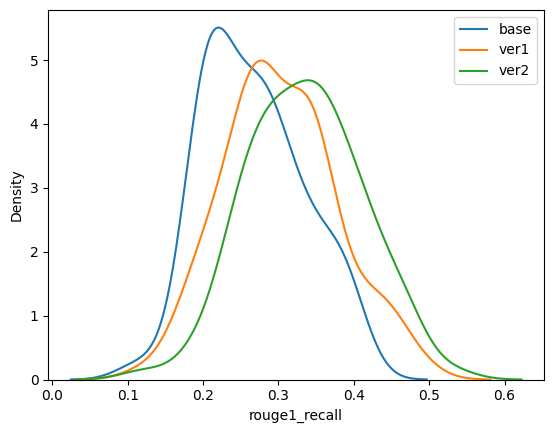

In [46]:
sns.distplot(cokg_base['rouge1_recall'], hist=None, label='base')
sns.distplot(cokg_ver1['rouge1_recall'], hist=None, label='ver1')
sns.distplot(cokg_ver2['rouge1_recall'], hist=None, label='ver2')
plt.legend()
plt.show()

In [50]:
temp = cokg_base['rouge1_recall']
temp = temp.reset_index()
temp_ = cokg_ver2[['rouge1_recall']]
temp_.columns = ['rouge1_recall_ver2']
temp_ = temp_.reset_index()
check_df = pd.merge(temp, temp_, on='index', how='left')
check_df['diff'] = check_df['rouge1_recall_ver2'] - check_df['rouge1_recall']

In [51]:
check_df.sort_values(by='diff', ascending=False).head(10)

,index,rouge1_recall,rouge1_recall_ver2,diff
61,61,0.354839,0.532258,0.177419
38,38,0.207843,0.372549,0.164706
65,65,0.193069,0.351485,0.158416
32,32,0.244048,0.398810,0.154762
48,48,0.216814,0.358407,0.141593
94,94,0.202091,0.341463,0.139373
4,4,0.323144,0.454148,0.131004
84,84,0.197309,0.327354,0.130045
14,14,0.306122,0.433673,0.127551
42,42,0.238739,0.364865,0.126126


In [52]:
target_list = [29, 17, 3, 21, 98, 24, 88, 44, 0, 78]
check_df[check_df['index'].isin(target_list)].sort_values(by='diff')

,index,rouge1_recall,rouge1_recall_ver2,diff
24,24,0.192727,0.178182,-0.014545
21,21,0.104430,0.120253,0.015823
3,3,0.186335,0.236025,0.049689
78,78,0.214912,0.267544,0.052632
0,0,0.231579,0.287719,0.056140
17,17,0.174468,0.234043,0.059574
44,44,0.244275,0.305344,0.061069
29,29,0.133333,0.200000,0.066667
88,88,0.183133,0.250602,0.067470
98,98,0.195946,0.293919,0.097973
